<a href="https://colab.research.google.com/github/aniscokyle/FTW-Exercises/blob/main/Anisco_Dataviz_with_Python_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


### ***Data Prep***

In [11]:
dataset = pd.read_excel('Data_Extract_From_World_Development_Indicators (1).xlsx', sheet_name= "Data", na_values = '..')
popsani = dataset.loc[dataset['Series Code'] == 'SH.STA.BASS.ZS']
popsani.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
57,Brunei Darussalam,BRN,People using at least basic sanitation service...,SH.STA.BASS.ZS,96.349042,96.349042,96.349042,96.349042,96.349042,96.349042,NaN,NaN,NaN,NaN,NaN
139,Cambodia,KHM,People using at least basic sanitation service...,SH.STA.BASS.ZS,37.820551,40.865758,43.944788,47.057304,50.204400,53.385751,56.601501,59.226966,NaN,NaN,NaN
221,Lao PDR,LAO,People using at least basic sanitation service...,SH.STA.BASS.ZS,56.454432,59.069493,61.670649,64.256554,66.828450,69.386121,71.930048,74.459410,NaN,NaN,NaN
303,Malaysia,MYS,People using at least basic sanitation service...,SH.STA.BASS.ZS,98.842652,99.023919,99.201969,99.377269,99.549908,99.557436,99.564853,99.572036,NaN,NaN,NaN
385,Myanmar,MMR,People using at least basic sanitation service...,SH.STA.BASS.ZS,67.011732,66.625874,66.240368,65.855063,65.470279,65.088189,64.708981,64.332684,NaN,NaN,NaN


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   822 non-null    object 
 1   Country Code   820 non-null    object 
 2   Series Name    820 non-null    object 
 3   Series Code    820 non-null    object 
 4   2010 [YR2010]  625 non-null    float64
 5   2011 [YR2011]  597 non-null    float64
 6   2012 [YR2012]  606 non-null    float64
 7   2013 [YR2013]  594 non-null    float64
 8   2014 [YR2014]  626 non-null    float64
 9   2015 [YR2015]  579 non-null    float64
 10  2016 [YR2016]  628 non-null    float64
 11  2017 [YR2017]  629 non-null    float64
 12  2018 [YR2018]  586 non-null    float64
 13  2019 [YR2019]  484 non-null    float64
 14  2020 [YR2020]  38 non-null     float64
dtypes: float64(11), object(4)
memory usage: 96.8+ KB


In [13]:
popsani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 57 to 795
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   10 non-null     object 
 1   Country Code   10 non-null     object 
 2   Series Name    10 non-null     object 
 3   Series Code    10 non-null     object 
 4   2010 [YR2010]  10 non-null     float64
 5   2011 [YR2011]  10 non-null     float64
 6   2012 [YR2012]  10 non-null     float64
 7   2013 [YR2013]  10 non-null     float64
 8   2014 [YR2014]  10 non-null     float64
 9   2015 [YR2015]  10 non-null     float64
 10  2016 [YR2016]  9 non-null      float64
 11  2017 [YR2017]  9 non-null      float64
 12  2018 [YR2018]  0 non-null      float64
 13  2019 [YR2019]  0 non-null      float64
 14  2020 [YR2020]  0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 1.2+ KB


In [14]:
#Dropping other string values
popsani_d=popsani.drop(['Country Code', 'Series Name', 'Series Code'], axis=1)
print(popsani_d)

          Country Name  2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  \
57   Brunei Darussalam      96.349042      96.349042      96.349042   
139           Cambodia      37.820551      40.865758      43.944788   
221            Lao PDR      56.454432      59.069493      61.670649   
303           Malaysia      98.842652      99.023919      99.201969   
385            Myanmar      67.011732      66.625874      66.240368   
467        Philippines      68.704499      69.803067      70.908387   
549          Singapore     100.000000     100.000000     100.000000   
631           Thailand      95.832471      96.258801      96.690976   
713            Vietnam      71.018007      72.854423      74.679365   
795          Indonesia      59.998730      61.871553      63.746379   

     2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
57       96.349042      96.349042      96.349042            NaN   
139      47.057304      50.204400      53.385751      56.601501   
221      64.25655

In [15]:
#Setting the index
popsani_d_ind=popsani_d.set_index('Country Name')
print(popsani_d_ind)

                   2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  \
Country Name                                                                    
Brunei Darussalam      96.349042      96.349042      96.349042      96.349042   
Cambodia               37.820551      40.865758      43.944788      47.057304   
Lao PDR                56.454432      59.069493      61.670649      64.256554   
Malaysia               98.842652      99.023919      99.201969      99.377269   
Myanmar                67.011732      66.625874      66.240368      65.855063   
Philippines            68.704499      69.803067      70.908387      72.020443   
Singapore             100.000000     100.000000     100.000000     100.000000   
Thailand               95.832471      96.258801      96.690976      97.127754   
Vietnam                71.018007      72.854423      74.679365      76.491721   
Indonesia              59.998730      61.871553      63.746379      65.622245   

                   2014 [YR

In [16]:
#Transpose year as index
popsani_t=popsani_d_ind.T
print(popsani_t)

Country Name   Brunei Darussalam   Cambodia    Lao PDR   Malaysia    Myanmar  \
2010 [YR2010]          96.349042  37.820551  56.454432  98.842652  67.011732   
2011 [YR2011]          96.349042  40.865758  59.069493  99.023919  66.625874   
2012 [YR2012]          96.349042  43.944788  61.670649  99.201969  66.240368   
2013 [YR2013]          96.349042  47.057304  64.256554  99.377269  65.855063   
2014 [YR2014]          96.349042  50.204400  66.828450  99.549908  65.470279   
2015 [YR2015]          96.349042  53.385751  69.386121  99.557436  65.088189   
2016 [YR2016]                NaN  56.601501  71.930048  99.564853  64.708981   
2017 [YR2017]                NaN  59.226966  74.459410  99.572036  64.332684   
2018 [YR2018]                NaN        NaN        NaN        NaN        NaN   
2019 [YR2019]                NaN        NaN        NaN        NaN        NaN   
2020 [YR2020]                NaN        NaN        NaN        NaN        NaN   

Country Name   Philippines  Singapore  

### ***Matplotlib***

**Scatter Plot**

Basic sanitation in 2010 and 2015 can be compared in this scatter plot. Other countries consistently has high access to basic sanitation, and most countries improved its percentage.

In [17]:
import matplotlib.pyplot as plt

Text(42.722222222222214, 0.5, '2015 [YR2015]')

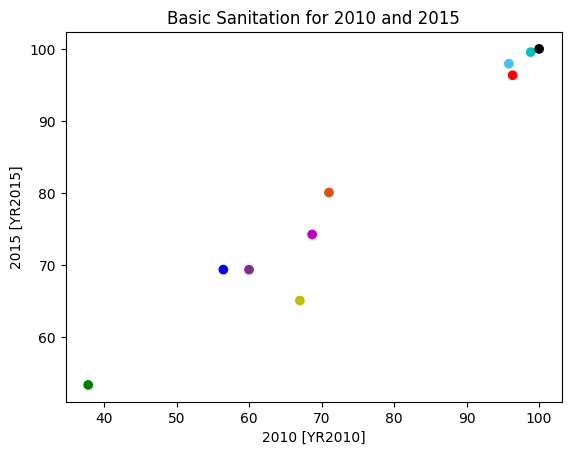

In [18]:
# create a figure and axis
fig, ax = plt.subplots()
plt.rcdefaults()
Colorvariable = ['r','g','b','c','y','m','k',	"#4DBEEE", "#D95319", "#7E2F8E"]

# scatter the x and y
ax.scatter(popsani_d_ind['2010 [YR2010]'], popsani_d_ind['2015 [YR2015]'], c=Colorvariable)
# set a title and labels
ax.set_title('Basic Sanitation for 2010 and 2015')
ax.set_xlabel('2010 [YR2010]')
ax.set_ylabel('2015 [YR2015]')

**Line Chart**

Compared to other countries where access to basic sanitation increased per year, the percentage of the population of Myanmar with access to basic sanitation decreased.

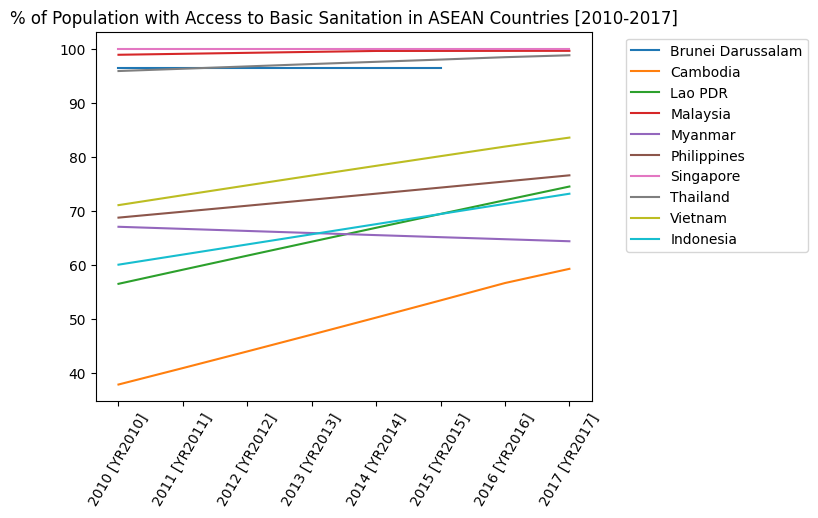

In [19]:
fig, ax = plt.subplots()
ax.plot(popsani_t)
ax.set_title('% of Population with Access to Basic Sanitation in ASEAN Countries [2010-2017]')
plt.xticks(rotation = 60)
ax.legend(popsani_t, loc='upper right', bbox_to_anchor=(1.45, 1))

**Histogram**

Around 3 ASEAN countries in 2017 has complete access to basic sanitation (100% of population).

Text(0, 0.5, 'Frequency')

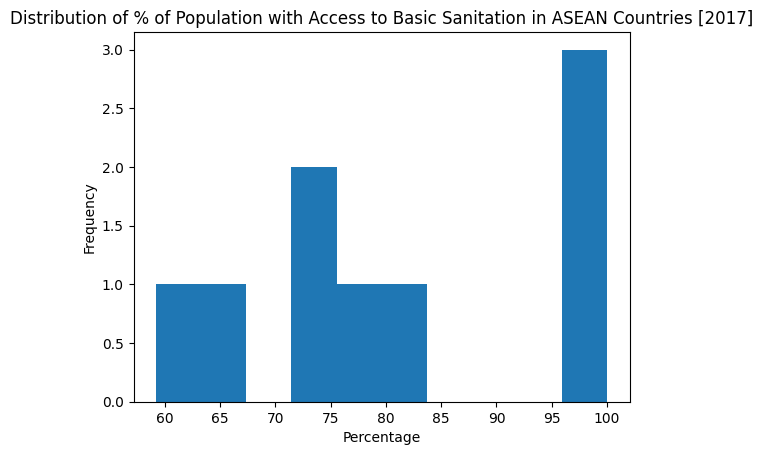

In [20]:
fig, ax = plt.subplots()
ax.hist(popsani_d_ind['2017 [YR2017]'])
ax.set_title('Distribution of % of Population with Access to Basic Sanitation in ASEAN Countries [2017]')
ax.set_xlabel('Percentage')
ax.set_ylabel('Frequency')

**Bar Chart**

The percentage of the population with Basic Sanitation in the Philippines increased gradually from 2010-2017.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2010 [YR2010]'),
  Text(1, 0, '2011 [YR2011]'),
  Text(2, 0, '2012 [YR2012]'),
  Text(3, 0, '2013 [YR2013]'),
  Text(4, 0, '2014 [YR2014]'),
  Text(5, 0, '2015 [YR2015]'),
  Text(6, 0, '2016 [YR2016]'),
  Text(7, 0, '2017 [YR2017]'),
  Text(8, 0, '2018 [YR2018]'),
  Text(9, 0, '2019 [YR2019]'),
  Text(10, 0, '2020 [YR2020]')])

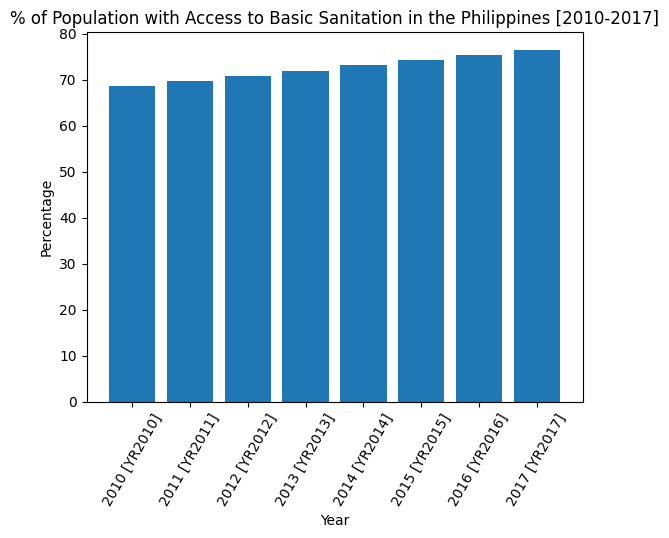

In [21]:
fig, ax = plt.subplots()
data = popsani_t['Philippines']
year = data.index
score = data.values
ax.bar(year, score)
ax.set_title('% of Population with Access to Basic Sanitation in the Philippines [2010-2017]')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
plt.xticks(rotation = 60)


### ***Pandas Visualization***

**Scatter Plot**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


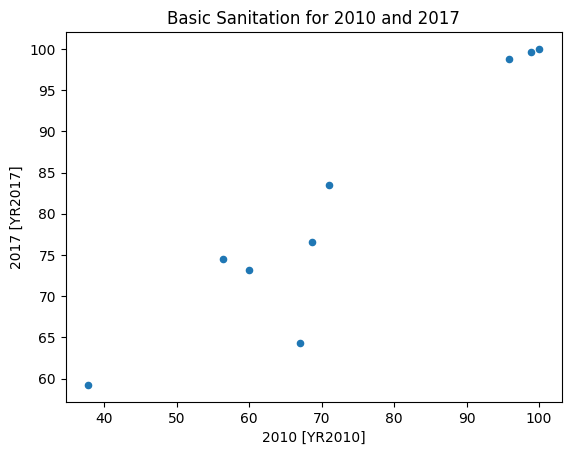

In [22]:
ps_scatter=popsani_d_ind.plot.scatter(x='2010 [YR2010]', y='2017 [YR2017]', title='Basic Sanitation for 2010 and 2017')
#Comparison of access to basic sanitation between 2010 and 2017 among ASEAN countries

**Line Chart**

One hundred percent of Singapore's population has access to basic sanitation from 2010-2017.

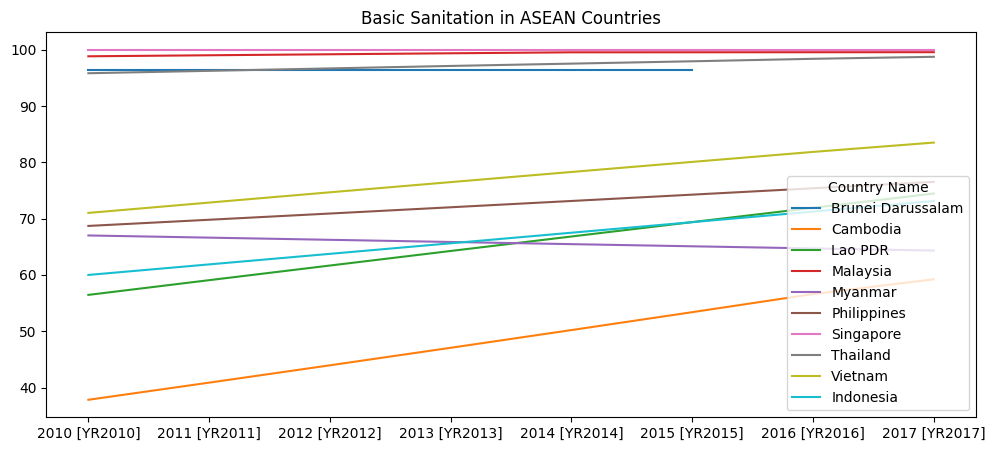

In [23]:
#Line chart for Basic Sanitation through the years
ps_line=popsani_t.plot.line(title="Basic Sanitation in ASEAN Countries", figsize=(12,5))


**Histogram**

<Axes: title={'center': 'Basic Sanitation in ASEAN Countries in 2017'}, ylabel='Frequency'>

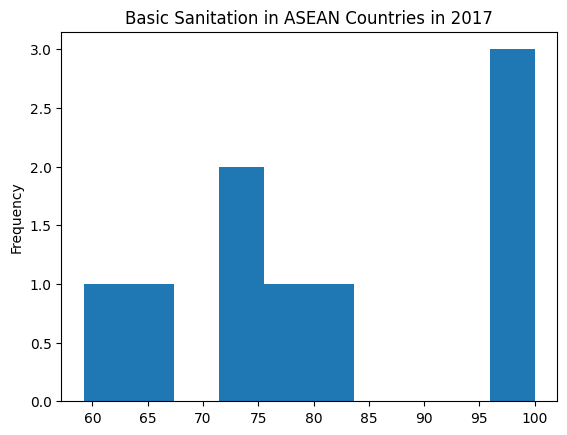

In [24]:
popsani_d_ind['2017 [YR2017]'].plot.hist(title="Basic Sanitation in ASEAN Countries in 2017", bins=10)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

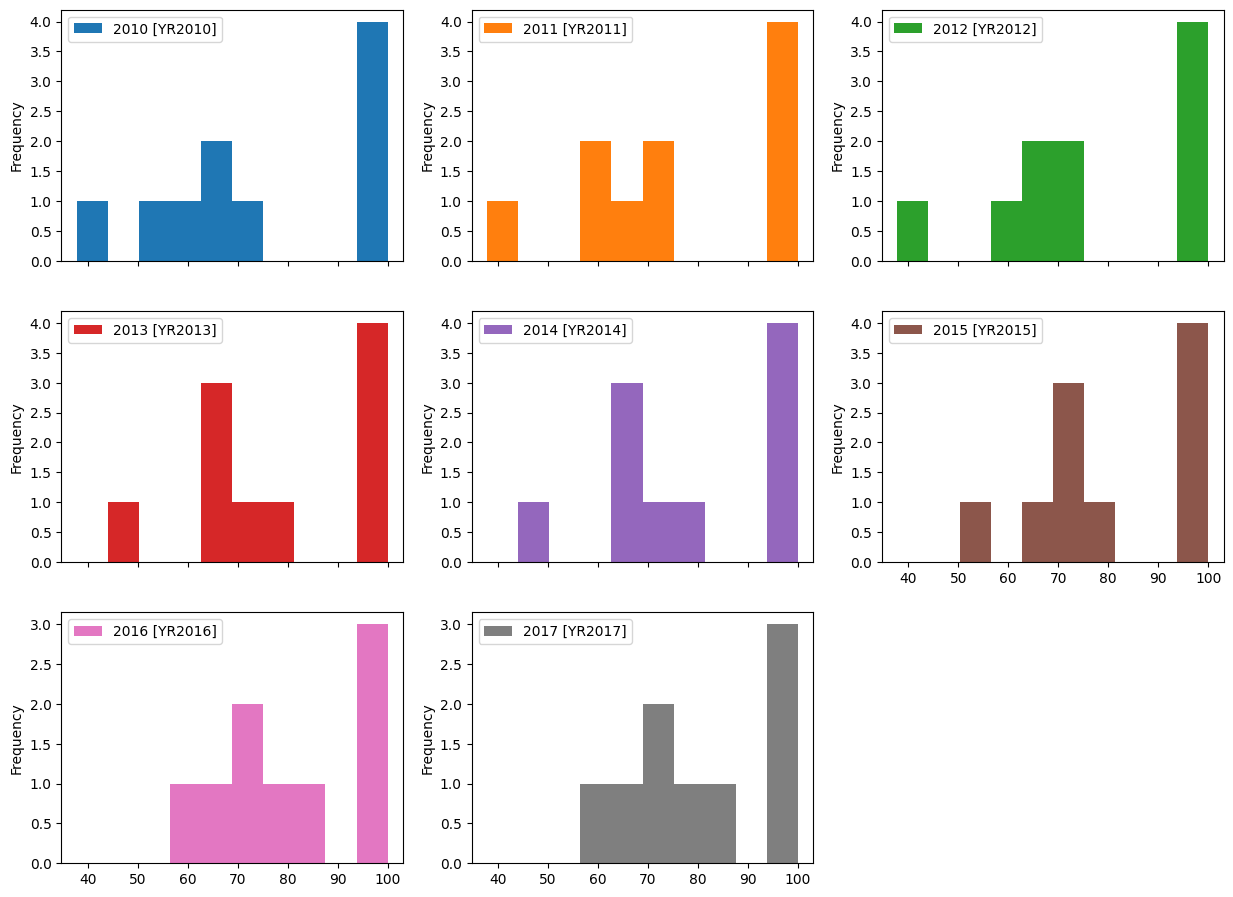

In [25]:
pd_h=popsani_d_ind.drop(['2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'], axis=1)

pd_h.plot.hist(subplots=True, layout=(4,3), figsize=(15,15), bins=10)

**Bar Chart**

<Axes: xlabel='Country Name'>

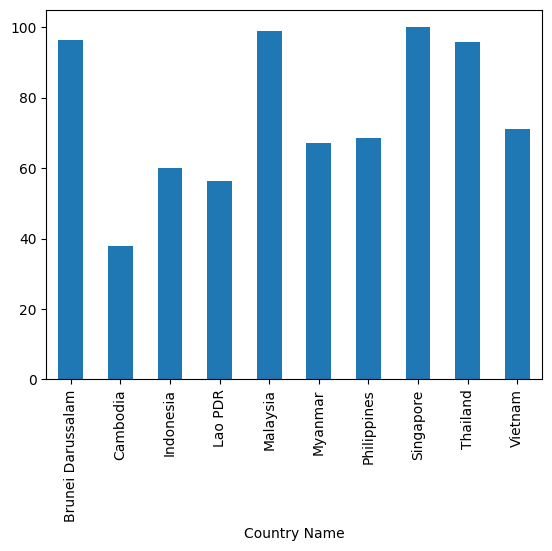

In [26]:
popsani_d_ind['2010 [YR2010]'].sort_index().plot.bar()

<Axes: ylabel='Country Name'>

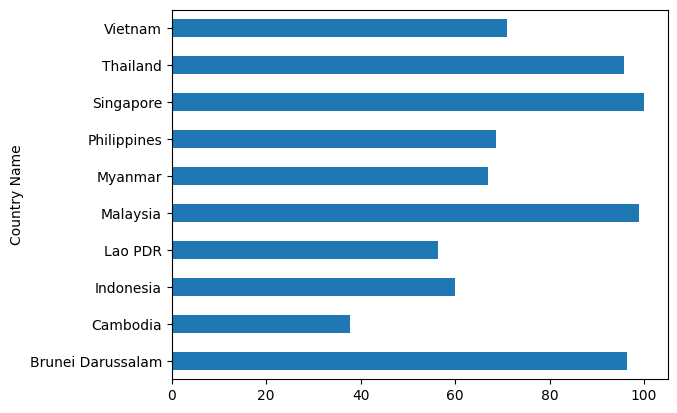

In [27]:
popsani_d_ind['2010 [YR2010]'].sort_index().plot.barh()

### ***Seaborn***

In [28]:
import seaborn as sns
sns.__version__

'0.12.2'

**Scatter Plot**

<Axes: xlabel='2010 [YR2010]', ylabel='2017 [YR2017]'>

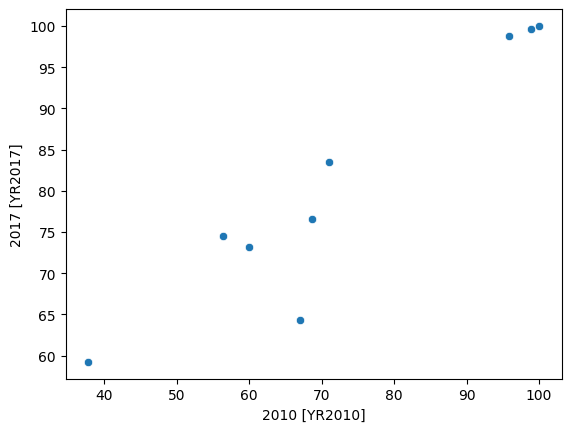

In [29]:
sns.scatterplot(x='2010 [YR2010]', y='2017 [YR2017]', data = popsani_d_ind)

**Line Chart**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brunei Darussalam'),
  Text(1, 0, 'Cambodia'),
  Text(2, 0, 'Lao PDR'),
  Text(3, 0, 'Malaysia'),
  Text(4, 0, 'Myanmar'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Singapore'),
  Text(7, 0, 'Thailand'),
  Text(8, 0, 'Vietnam'),
  Text(9, 0, 'Indonesia')])

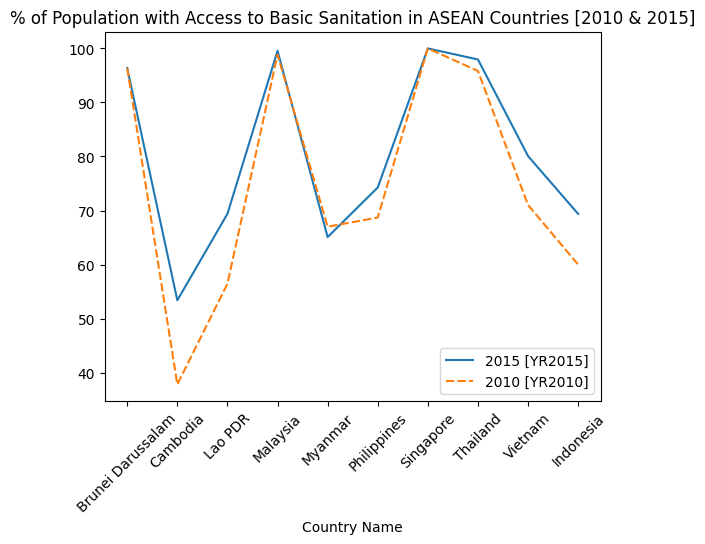

In [30]:
g = sns.lineplot(data=popsani_d_ind[['2015 [YR2015]', '2010 [YR2010]']]).set(title='% of Population with Access to Basic Sanitation in ASEAN Countries [2010 & 2015]')
plt.xticks(rotation=45)


**Histogram**

<Axes: xlabel='2017 [YR2017]', ylabel='Count'>

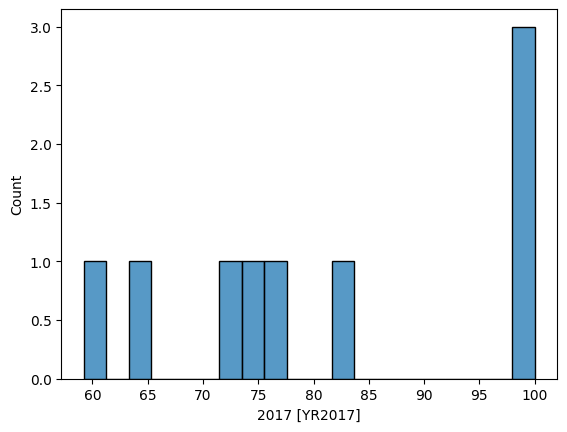

In [44]:
sns.histplot(popsani_d_ind['2017 [YR2017]'], bins=20, kde=False)

<Axes: xlabel='2017 [YR2017]', ylabel='Count'>

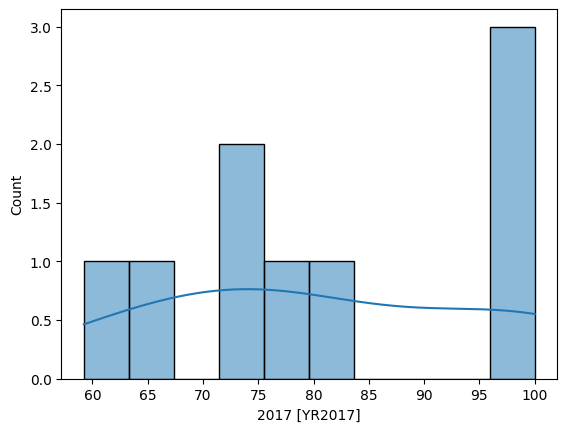

In [43]:
sns.histplot(popsani_d_ind['2017 [YR2017]'], bins=10, kde=True)

Bar Chart

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2010 [YR2010]'),
  Text(1, 0, '2011 [YR2011]'),
  Text(2, 0, '2012 [YR2012]'),
  Text(3, 0, '2013 [YR2013]'),
  Text(4, 0, '2014 [YR2014]'),
  Text(5, 0, '2015 [YR2015]'),
  Text(6, 0, '2016 [YR2016]'),
  Text(7, 0, '2017 [YR2017]')])

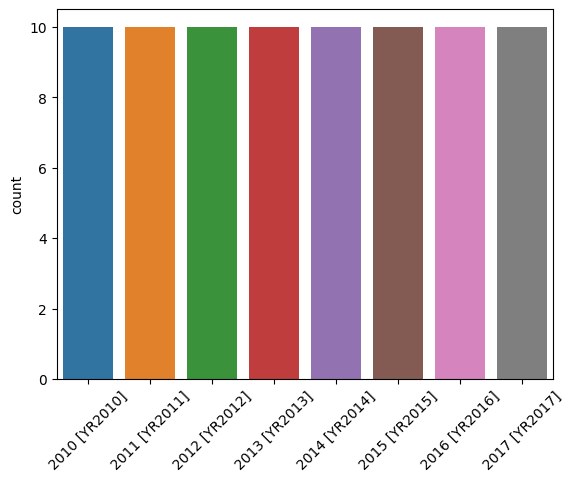

In [33]:
sns.countplot(data=popsani_d_ind[['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]','2016 [YR2016]','2017 [YR2017]']])
plt.xticks(rotation=45)

#No. of countries with data about % of population with access to basic sanitation during 2010-2017

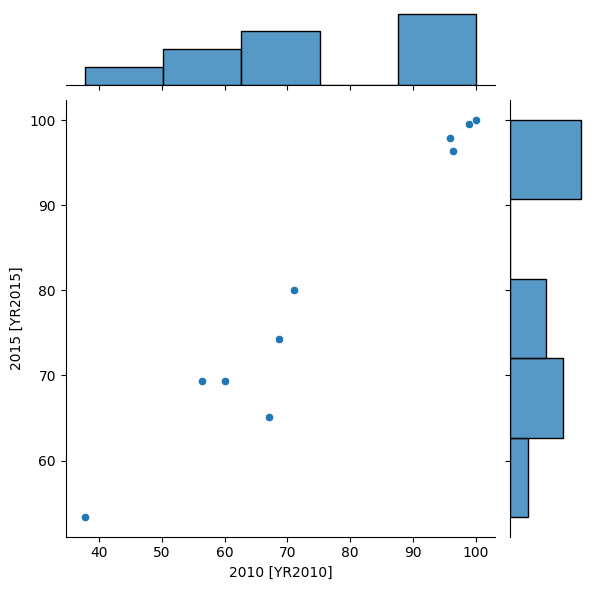

In [34]:
fig=sns.jointplot(x='2010 [YR2010]', y='2015 [YR2015]', data=popsani_d_ind)

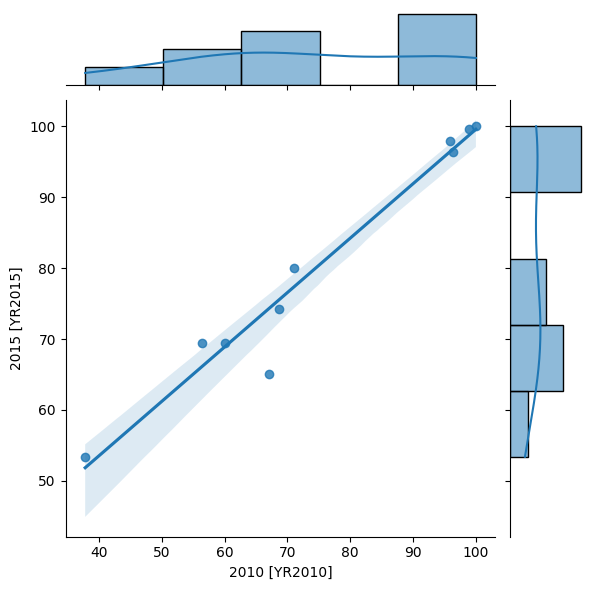

In [35]:
fig=sns.jointplot(x='2010 [YR2010]', y='2015 [YR2015]', data=popsani_d_ind, kind='reg')

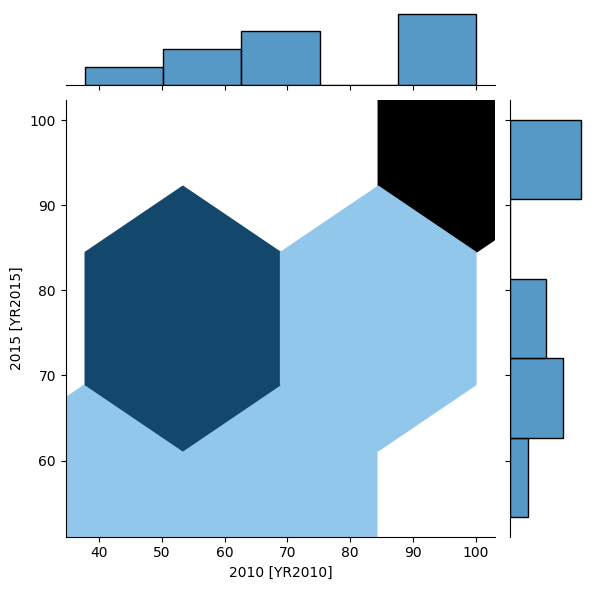

In [36]:
fig=sns.jointplot(x='2010 [YR2010]', y='2015 [YR2015]', data=popsani_d_ind, kind='hex')

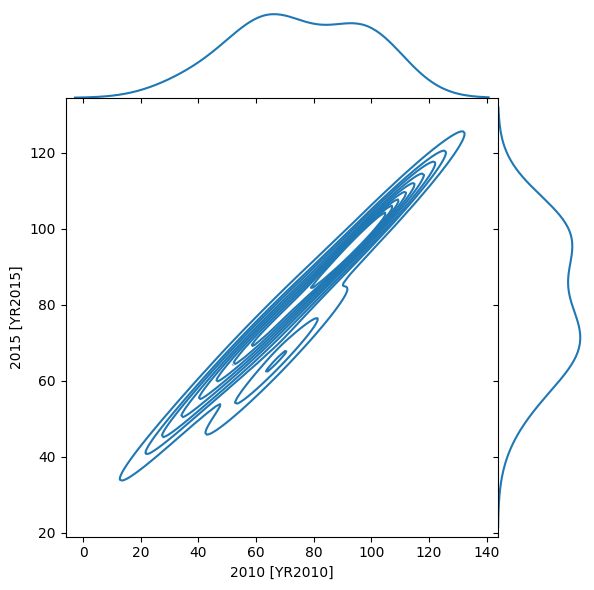

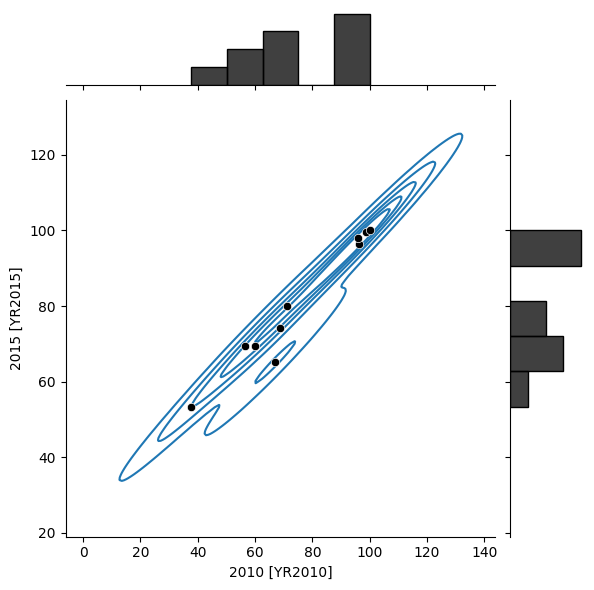

In [37]:
fig=sns.jointplot(x='2010 [YR2010]', y='2015 [YR2015]', data=popsani_d_ind, kind='kde', space=0)
g = (sns.jointplot(x='2010 [YR2010]', y='2015 [YR2015]',data=popsani_d_ind, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

**Box Plot**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Cambodia'),
  Text(1, 0, 'Lao PDR'),
  Text(2, 0, 'Malaysia'),
  Text(3, 0, 'Myanmar'),
  Text(4, 0, 'Philippines'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'Thailand'),
  Text(7, 0, 'Vietnam'),
  Text(8, 0, 'Indonesia')])

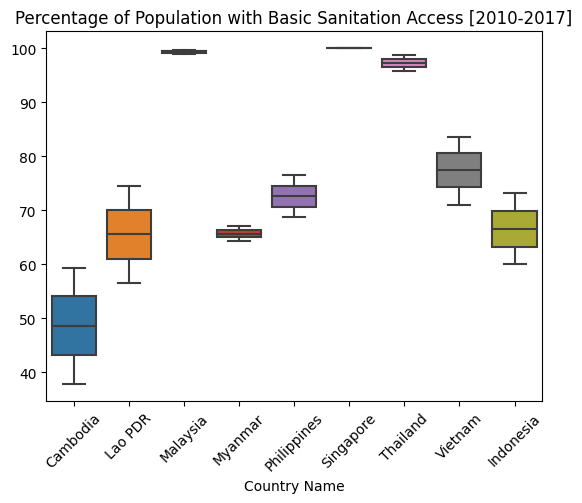

In [38]:
sns.boxplot(data=popsani_t.drop(['Brunei Darussalam'], axis=1)).set(title='Percentage of Population with Basic Sanitation Access [2010-2017]')
plt.xticks(rotation=45)



Pie Plot

<Axes: ylabel='None'>

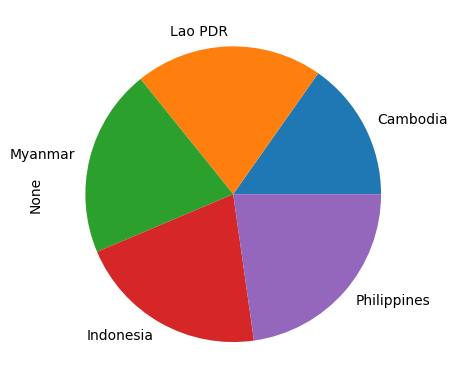

In [39]:
popsani_t.mean().sort_values(ascending=True)[:5].plot.pie()


Heatmap

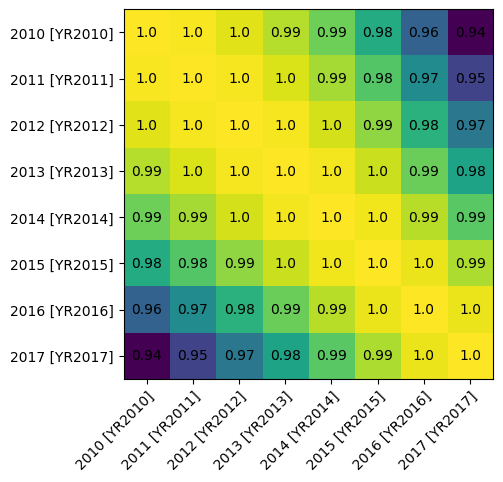

In [40]:
corr = popsani_d_ind.drop(['2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'], axis=1).corr()
fig, ax = plt.subplots()
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

Text(0.5, 1.0, '% of Basic Sanitation-Urban')

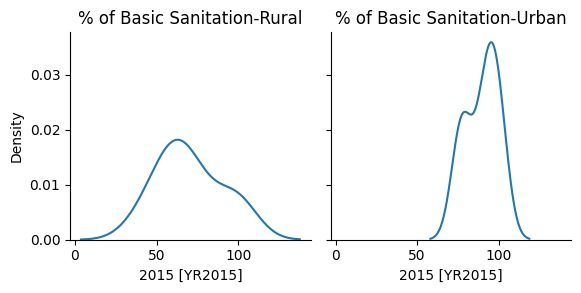

In [41]:
demo = ['SH.STA.BASS.RU.ZS', 'SH.STA.BASS.UR.ZS']
popsani_new = dataset.loc[dataset['Series Code'].isin(demo)]

e = sns.FacetGrid(popsani_new, col='Series Code')
e = e.map(sns.kdeplot, '2015 [YR2015]')

axes = e.axes.flatten()

axes[0].set_title("% of Basic Sanitation-Rural")
axes[1].set_title("% of Basic Sanitation-Urban")


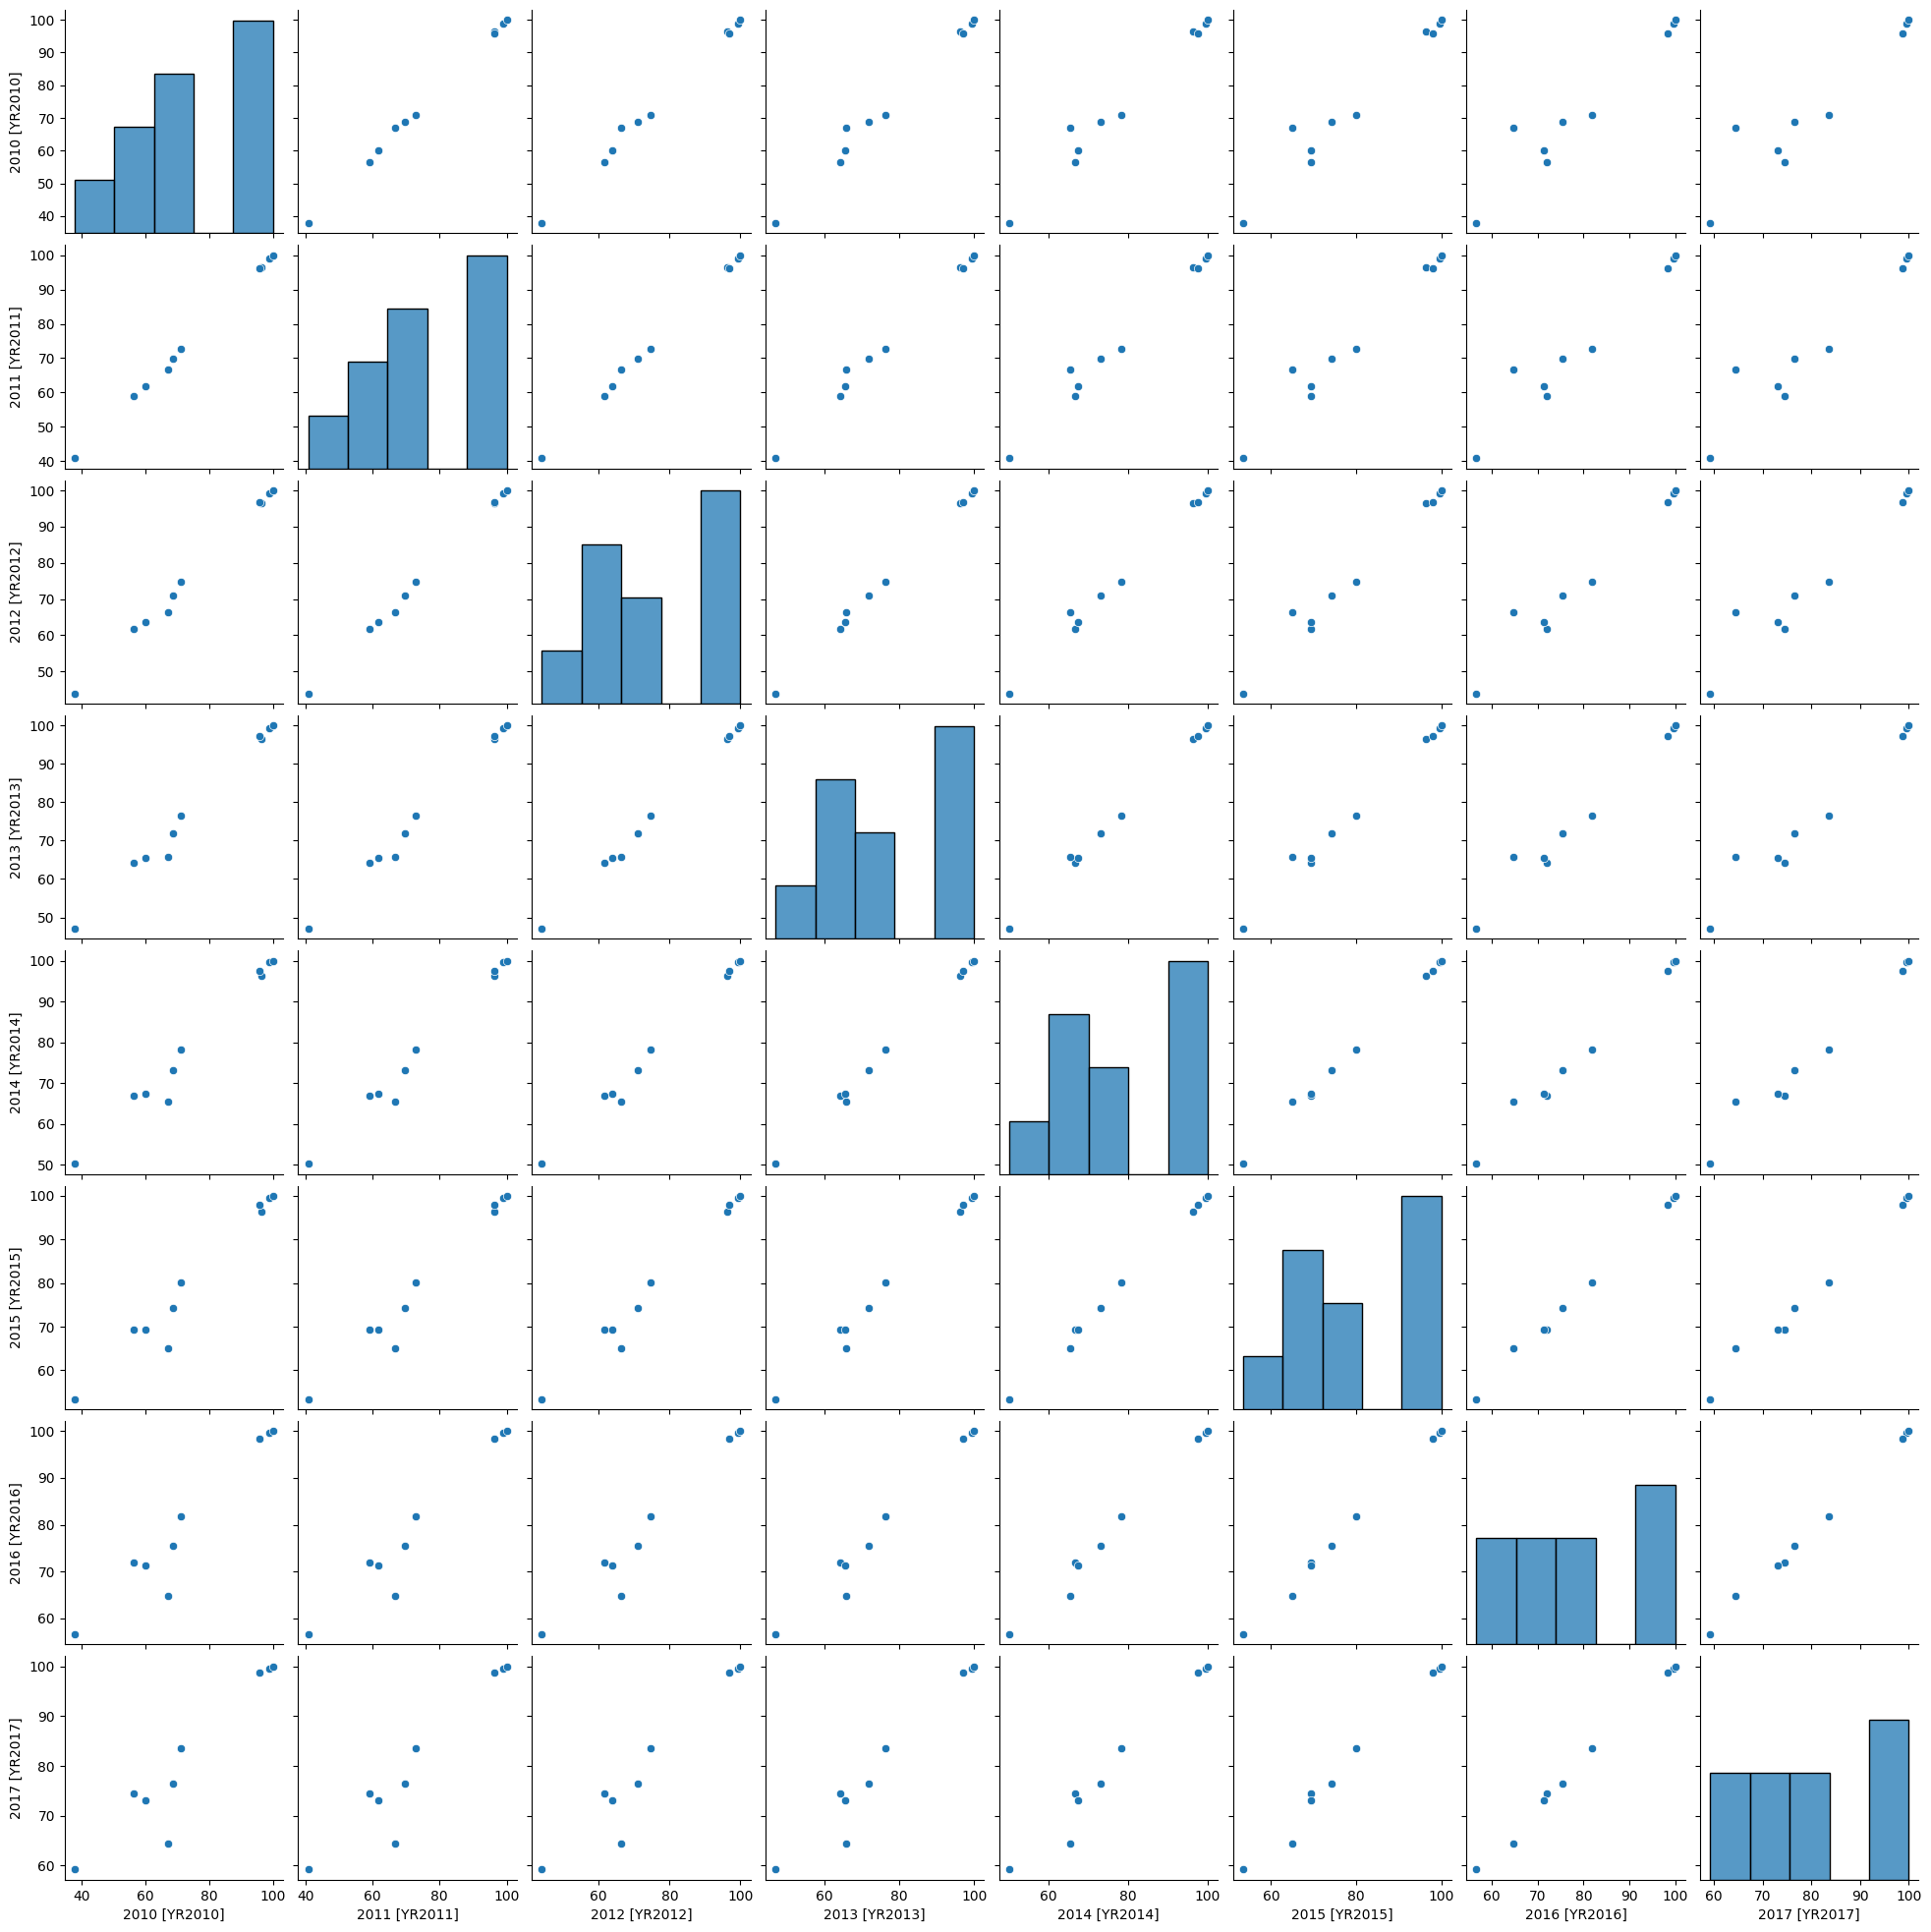

In [42]:
sns.pairplot(popsani_d_ind.drop(['2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'], axis=1))